<a href="https://colab.research.google.com/github/Soham-2004/BERT-NER/blob/master/bert_convlstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import nltk
nltk.download('averaged_perceptron_tagger')
  
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.
from tqdm import tqdm, trange

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [59]:
from tqdm import tqdm, trange
from google.colab import files
uploaded = files.upload()
input_data = pd.read_csv("ner_dataset.csv", encoding="latin1")
#input_data
input_data['Word'] = input_data['Word'].astype(str)
input_data = input_data.fillna(method="ffill")


Saving ner_dataset.csv to ner_dataset (3).csv


In [60]:
input_data

,Word,Tag
0,Adobe,O
1,has,O
2,released,O
3,security,O
4,updates,O
...,...,...
49078,inside,O
49079,the,O
49080,GDGS,O
49081,building,O


In [61]:
s=[]
t=[]
l=[]
word=[]
Tag=[]
Lab=[]
La=[]
Label=[]
w=""
j=0
i=1
z=0
for y in input_data.Word:
    if(y!='EOS'):
        word.append(y)
        La.append(input_data.Tag[z])
        Tag.append(input_data.Tag[j])
        
        
        
        s=i
        t.append(s)
    else:
        i=i+1
        Label.append(La)
        La=[]
    z=z+1
        
    j=j+1
        
t[-1]

#input_data['Sentence #']=t
        
len(Tag)

          

47467

In [62]:
input_data.Tag.value_counts(normalize=False)
from collections import Counter
counts = Counter(Tag)
print(Tag)

['O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'MODIFIER', 'MODIFIER', 'MODIFIER', 'O', 'EXPLOIT-TARGET', 'O', 'EXPLOIT-TARGET', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'EXPLOIT-TARGET', 'O', 'SOFTWARE', 'SOFTWARE', 'SOFTWARE', 'VERSION', 'O', 'O', 'O', 'O', 'EXPLOIT-TARGET', 'VERSION', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ATTACK-PATTERN', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'VULNERABILITY', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'ATTACK-PATTERN', 'O', 'O', 'O', 'O', 'VULNERABILITY', 'O', 'O', 'SOFTWARE', 'O', 'O', 'SOFTWARE', 'SOFTWARE', 'O', 'EXPLOIT-TARGET', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'VU

In [63]:
df=pd.DataFrame()
df['Sentence #']=t
df['Word']=word
df['Tag']=Tag


df.head(15)

,Sentence #,Word,Tag
0,1,Adobe,O
1,1,has,O
2,1,released,O
3,1,security,O
4,1,updates,O
5,1,for,O
6,1,Adobe,SOFTWARE
7,1,Flash,SOFTWARE
8,1,Player,SOFTWARE
9,1,11.5.502.146,VERSION


In [64]:
type(t)
df = df.fillna(method = 'ffill')
# This is a class te get sentence. The each sentence will be list of tuples with its tag and pos.
class sentence(object):
    def __init__(self, df):
        self.n_sent = 1
        self.df = df
        self.empty = False
        agg = lambda s : [(w, t) for w,  t in zip(s['Word'].values.tolist(),
                                                       
                                                       s['Tag'].values.tolist())]
        self.grouped = self.df.groupby("Sentence #").apply(agg)
        self.sentences = [s for s in self.grouped]
        
    def get_text(self):
        try:
            s = self.grouped[' '.format(self.n_sent)]
            self.n_sent +=1
            return s
        except:
            return None
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sent = getter.sentences



In [65]:
print('                     This is what a sentence looks like:')
print(sent[89
])

                     This is what a sentence looks like:
[('For', 'O'), ('users', 'O'), ('of', 'O'), ('Adobe', 'SOFTWARE'), ('Reader', 'SOFTWARE'), ('9.4.2', 'SOFTWARE'), ('for', 'O'), ('Windows', 'EXPLOIT-TARGET'), ('and', 'O'), ('Macintosh', 'EXPLOIT-TARGET'), ('nan', 'O'), ('Adobe', 'O'), ('has', 'O'), ('made', 'O'), ('available', 'O'), ('the', 'O'), ('update', 'O'), ('nan', 'O'), ('Adobe', 'SOFTWARE'), ('Reader', 'SOFTWARE'), ('9.4.3', 'SOFTWARE'), ('.', 'O')]


In [66]:
getter = sentence(df)
sentences = [" ".join([s[0] for s in sent]) for sent in getter.sentences]
sentences[0]

'Adobe has released security updates for Adobe Flash Player 11.5.502.146 and earlier versions for Windows and Macintosh Adobe Flash Player 11.2.202.261 and earlier versions for Linux nan Adobe Flash Player 11.1.115.36 and earlier versions for Android 4.x and Adobe Flash Player 11.1.111.31 and earlier versions for Android 3.x and 2 .'

In [67]:
sent = getter.sentences
sent

[[('Adobe', 'O'),
  ('has', 'O'),
  ('released', 'O'),
  ('security', 'O'),
  ('updates', 'O'),
  ('for', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.5.502.146', 'VERSION'),
  ('and', 'MODIFIER'),
  ('earlier', 'MODIFIER'),
  ('versions', 'MODIFIER'),
  ('for', 'O'),
  ('Windows', 'EXPLOIT-TARGET'),
  ('and', 'O'),
  ('Macintosh', 'EXPLOIT-TARGET'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.2.202.261', 'VERSION'),
  ('and', 'O'),
  ('earlier', 'O'),
  ('versions', 'O'),
  ('for', 'O'),
  ('Linux', 'EXPLOIT-TARGET'),
  ('nan', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.1.115.36', 'VERSION'),
  ('and', 'O'),
  ('earlier', 'O'),
  ('versions', 'O'),
  ('for', 'O'),
  ('Android', 'EXPLOIT-TARGET'),
  ('4.x', 'EXPLOIT-TARGET'),
  ('and', 'O'),
  ('Adobe', 'SOFTWARE'),
  ('Flash', 'SOFTWARE'),
  ('Player', 'SOFTWARE'),
  ('11.1.111.31', 'VERSION'),
  ('and', 'O'

In [68]:
words = list(set(input_data["Word"].values))
words.append("ENDPAD")
n_words = len(words); n_words
tags = list(set(input_data["Tag"].values))
n_tags = len(tags); n_tags
max_len = 75
word2idx = {w: i + 1 for i, w in enumerate(words)}
tag2idx = {t: i for i, t in enumerate(tags)}

In [69]:
word2idx["Adobe"]


3923

In [70]:
tag2idx

{'ATTACK-PATTERN': 2,
 'COURSE-OF-ACTION': 11,
 'EXPLOIT-TARGET': 9,
 'FILE': 3,
 'INDICATOR': 10,
 'MALWARE': 1,
 'MODIFIER': 7,
 'O': 0,
 'SOFTWARE': 12,
 'STOP': 8,
 'TOOL': 4,
 'VERSION': 6,
 'VULNERABILITY': 5}

In [71]:
from keras.preprocessing.sequence import pad_sequences
X = [[word2idx[w[0]] for w in s] for s in sent]


In [72]:
X = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)

In [73]:
y = [[tag2idx[w[1]] for w in s] for s in sent]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx["O"])
y.shape

(1616, 75)

In [74]:
from keras.utils import to_categorical
y = [to_categorical(i, num_classes=n_tags) for i in y]
from sklearn.model_selection import train_test_split
X_tr, y_tr = X, y

print('Raw Sample: ', ' '.join([w[0] for w in sent[0]]))
print('Raw Label: ', ' '.join([w[1] for w in sent[0]]))
print('After processing, sample:', X[0])
print('After processing, labels:', y[0])


Raw Sample:  Adobe has released security updates for Adobe Flash Player 11.5.502.146 and earlier versions for Windows and Macintosh Adobe Flash Player 11.2.202.261 and earlier versions for Linux nan Adobe Flash Player 11.1.115.36 and earlier versions for Android 4.x and Adobe Flash Player 11.1.111.31 and earlier versions for Android 3.x and 2 .
Raw Label:  O O O O O O SOFTWARE SOFTWARE SOFTWARE VERSION MODIFIER MODIFIER MODIFIER O EXPLOIT-TARGET O EXPLOIT-TARGET SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET EXPLOIT-TARGET O SOFTWARE SOFTWARE SOFTWARE VERSION O O O O EXPLOIT-TARGET VERSION O O O
After processing, sample: [3923  485 2433 3443 2283 2989 3923 3862  972  875 4559 3107 4382 2989
 1058 4559 3182 3923 3862  972 2140 4559 3107 4382 2989 3958 4637 3923
 3862  972 3536 4559 3107 4382 2989 3496 3502 4559 3923 3862  972 2027
 4559 3107 4382 2989 3496 4206 4559 4323 3959    0    0    0    0    0
    0    0    0 

In [75]:
np.array(y).shape

(1616, 75, 13)

In [76]:
!pip install git+https://www.github.com/keras-team/keras-contrib.git

  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-l4ts0has
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-l4ts0has
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101064 sha256=63458c702581bce75eb3bc392848c40c7a488bab242a7badb2a8478985e0a49f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yb71mgjh/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [77]:
from keras.models import Model, Input
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from keras_contrib.layers import CRF


In [78]:
!pip install tensorflow==1.15.0

In [79]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [80]:
X_tr.shape

(1616, 75)

In [81]:
data=pd.DataFrame()
data['Text_Final']=sentences

data['Label']=Label
data

,Text_Final,Label
0,Adobe has released security updates for Adobe ...,"[O, O, O, O, O, O, SOFTWARE, SOFTWARE, SOFTWAR..."
1,x. These updates address vulnerabilities that ...,"[O, O, O, O, O, O, O, O, O, O, ATTACK-PATTERN,..."
2,Adobe is aware of reports that CVE-2013-0633 i...,"[O, O, O, O, O, O, VULNERABILITY, O, O, O, O, ..."
3,The exploit for CVE-2013-0633 targets the Acti...,"[O, O, O, VULNERABILITY, O, O, SOFTWARE, O, O,..."
4,Adobe is also aware of reports that CVE-2013-0...,"[O, O, O, O, O, O, O, VULNERABILITY, O, O, O, ..."
...,...,...
1611,Logging on to a system inside the organization...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]"
1612,For more information nan see the subsection na...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1613,From this we can infer some additional functio...,"[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
1614,All of the CnC communications are performed ov...,"[O, O, O, O, O, O, O, O, O, O, O, MALWARE, MAL..."


In [82]:
!pip install -U sentence-transformers
sentences= data.Text_Final.values.tolist()
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('bert-base-nli-mean-tokens')


Requirement already up-to-date: sentence-transformers in /usr/local/lib/python3.6/dist-packages (0.3.2)


In [83]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(sentences, test_size=0.10, random_state=42)

In [84]:
len(train)

1454

In [85]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y, test_size=0.10, random_state=42)

In [86]:
len(X_train)

1454

In [87]:
np.array(Y_train).shape

(1454, 75, 13)

In [88]:
embeddings = model.encode(train)


In [89]:
embeddings=np.array(embeddings)

In [90]:
embeddings=embeddings
EMBEDDING_DIM = 768
print(embeddings.shape)

max_sequence_length=max_len
num_words=n_words + 1
embedding_dim=EMBEDDING_DIM
num_tags = df['Tag'].nunique()
# Model architecture
embedding_layer = Embedding(num_words,
                            embedding_dim,
                            weights=[embeddings],
                            input_length=max_sequence_length,
                            trainable=False)

(1454, 768)


In [92]:

from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
dropout=0.2
from keras.layers import Lambda, Input, Dropout, Masking, BatchNormalization, Activation
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
num_tags = df['Tag'].nunique()+1
# Model architecture
input = Input(shape=(max_len,), dtype='int32')
model = embedding_layer(input)

model = Conv1D(filters=256, kernel_size=10, name='conv_1')(model)
model = BatchNormalization()(model)
model = Activation('relu')(model)
model = Dropout(dropout, name='dropout_1')(model)
        
model = LSTM(128, activation='relu', return_sequences=True,
             dropout=dropout, name='lstm_1')(model)

#     # 1 fully connected layer DNN ReLu with default 20% dropout
model = Dense(units=64, activation='relu', name='fc')(model)
model = Dropout(dropout, name='dropout_2')(model)

    # Output layer with softmax
y_pred = Dense(units=num_tags, activation='softmax', name='softmax')(model)

model = Model(inputs=input, outputs=y_pred)
    


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 75)                0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 75, 768)           3637248   
_________________________________________________________________
conv_1 (Conv1D)              (None, 66, 256)           1966336   
_________________________________________________________________
batch_normalization_1 (Batch (None, 66, 256)           1024      
_________________________________________________________________
activation_1 (Activation)    (None, 66, 256)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 66, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 66, 128)           1971

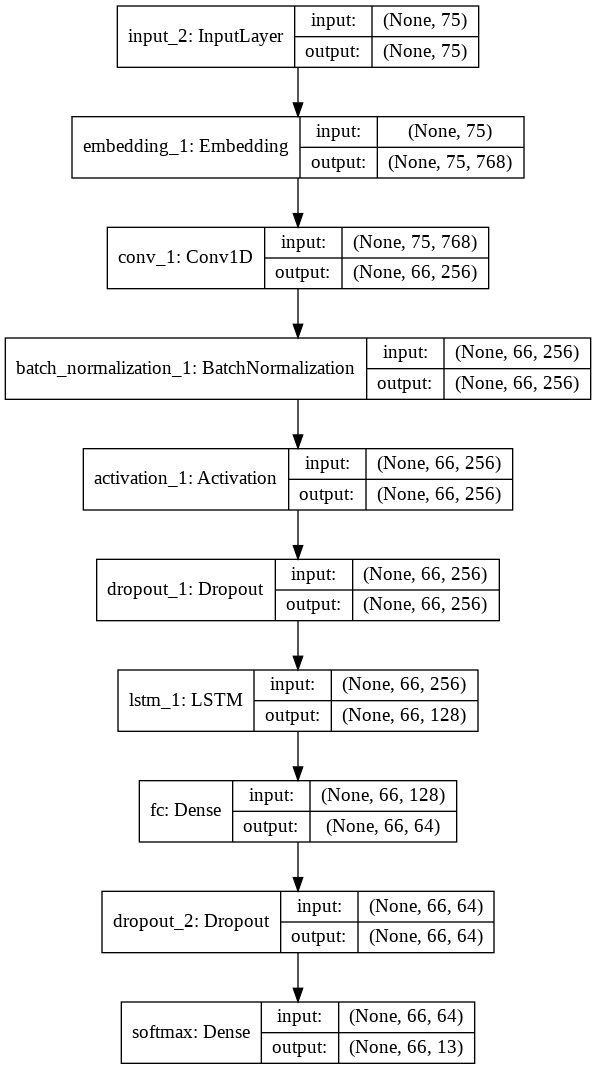

In [93]:

from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
l=66
Y_train = pad_sequences(Y_train, maxlen=66)
history = model.fit(X_train, np.array(Y_train), batch_size=128, epochs=45,                    validation_split=0.1, verbose=1)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 1308 samples, validate on 146 samples
Epoch 1/45
1308/1308 [==============================] - 20s 16ms/step - loss: 1.0501 - accuracy: 0.7470 - val_loss: 0.9524 - val_accuracy: 0.9253
Epoch 2/45
1308/1308 [==============================] - 20s 15ms/step - loss: 0.3840 - accuracy: 0.9291 - val_loss: 0.8647 - val_accuracy: 0.9255
Epoch 3/45
1308/1308 [==============================] - 20s 15ms/step - loss: 0.3767 - accuracy: 0.9312 - val_loss: 0.8525 - val_accuracy: 0.9255
Epoch 4/45
1308/1308 [==============================] - 19s 15ms/step - loss: 0.3781 - accuracy: 0.9315 - val_loss: 0.8095 - val_accuracy: 0.9255
Epoch 5/45
1308/1308 [==============================] - 19s 15ms/step - loss: 0.3513 - accuracy: 0.9313 - val_loss: 0.7383 - val_accuracy: 0.9255
Epoch 6/45
1308/1308 [==============================] - 19s 15ms/step - loss: 0.3373 - accuracy: 0.9326 - val_loss: 0.6974 - val_accuracy: 0.9255
Epoch 7/45
1308/1308 [==============================] - 20s 15ms/step - loss:

In [ ]:
np.array(Y_train).shape

In [ ]:
hist = pd.DataFrame(history.history)


In [ ]:
import matplotlib.pyplot as plt
# Plot the graph 
plt.style.use('ggplot')

def plot_history(history):
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(accuracy) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, accuracy, 'b', label='Training acc')
    plt.plot(x, val_accuracy, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
!pip install seqeval


In [ ]:
Y_test = pad_sequences(Y_test, maxlen=66)

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
test_pred = model.predict(X_test, verbose=1)

In [ ]:
idx2tag = {i: w for w, i in tag2idx.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PAD", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = pred2label(Y_test)

In [ ]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

In [ ]:
print(classification_report(test_labels, pred_labels))

In [ ]:
score=model.evaluate(X_test, np.array(Y_test))
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
i = 161

p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
true = np.argmax(Y_test[i], -1)
print("{:15}||{:5}||{}".format("Word", "True", "Pred"))
print(30 * "=")
for w, t, pred in zip(X_test[i], true, p[0]):
    if w != 0:
        print("{:15}: {:5} {}".format(words[w-1], tags[t], tags[pred]))

In [ ]:
y=np.array(y)
y.shape

!pip install -q iterative-stratification




In [ ]:
!pip install -q iterative-stratification
!pip install scikit-multilearn

In [ ]:
y=np.array(y)
y.shape

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
num_folds = 10

In [ ]:
# Normalize data
input_train = X_train / 255
input_test = X_test / 255

# Define per-fold score containers <-- these are new
acc_per_fold = []
loss_per_fold = []

In [ ]:
# Merge inputs and targets
inputs = np.concatenate((input_train, input_test), axis=0)
targets = np.concatenate((Y_train, Y_test), axis=0)

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=num_folds, shuffle=True)
batch_size=128
no_epochs=45
verbosity=1
# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(inputs, targets):




  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(inputs[train], targets[train],
              batch_size=batch_size,
              epochs=no_epochs,
              verbose=verbosity)

  # Generate generalization metrics
  scores = model.evaluate(inputs[test], targets[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')
